In [3]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [4]:
league_2017 = 'csv/cumulative_player_stats-20162017.csv'
league_2018 = 'csv/cumulative_player_stats-20172018.csv'

read_2017 = pd.read_csv(league_2017, dtype = object)
read_2018 = pd.read_csv(league_2018, dtype = object)

### Creating Sqlite Database

In [5]:
#Python SQL toolkite and Object Relational Mapper
import sqlalchemy
from sqlalchemy import create_engine, MetaData
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String


In [6]:
Declare_Base = declarative_base()

class NHL_2017(Declare_Base):
    __tablename__ = 'table_2017'
    
    id = Column(Integer, primary_key = True) 
    Player_ID = Column(Integer) 
    LastName = Column(String)
    FirstName = Column(String)
    Jersey_Num = Column(Integer)
    Position = Column(String)
    Height = Column(String)
    Weight = Column(Integer)
    Birth_Date = Column(String)
    Age = Column(Integer)
    Birth_City = Column(String)
    Birth_Country = Column(String)
    Rookie = Column(String)
    Team_ID = Column(Integer)
    Team_Abbr = Column(String)
    Team_City = Column(String)
    Team_Name = Column(String)
    GamesPlayed = Column(Integer)
    Goals = Column(Integer)
    Assists = Column(Integer)
    Points = Column(Integer)
    Shots = Column(Integer)
    
    def __repr__(self):
        return f'id={self.id},name={self.name}'

In [7]:
engine = create_engine('sqlite:///league_2017.sqlite')
conn = engine.connect()

In [8]:
Declare_Base.metadata.create_all(engine)

In [9]:
metadata = MetaData(bind = engine)
metadata.reflect()

In [10]:
table = sqlalchemy.Table('table_2017', metadata, autoload = True)

---

In [11]:
#when rerunning the code
conn.execute(table.delete())

---

In [12]:
nhl_2017 = read_2017.to_dict(orient = 'records')

In [13]:
print(nhl_2017[:1])

[{'Player_ID': '5263', 'LastName': 'Abbott', 'FirstName': 'Spencer', 'Jersey_Num': '24', 'Position': 'LW', 'Height': '5\'9"', 'Weight': '170', 'Birth_Date': '4/30/1988', 'Age': '29', 'Birth_City': 'Hamilton, ON', 'Birth_Country': 'Canada', 'Rookie': 'Y', 'Team_ID': '20', 'Team_Abbr': 'CHI', 'Team_City': 'Chicago', 'Team_Name': 'Blackhawks', 'GamesPlayed': '1', 'Goals': '0', 'Assists': '0', 'Points': '0', 'Shots': '1'}]


In [14]:
conn.execute(table.insert(), nhl_2017)

### testing database

In [15]:
conn.execute('SELECT * FROM table_2017 LIMIT 5').fetchall()

[(1, 5263, 'Abbott', 'Spencer', 24, 'LW', '5\'9"', 170, '4/30/1988', 29, 'Hamilton, ON', 'Canada', 'Y', 20, 'CHI', 'Chicago', 'Blackhawks', 1, 0, 0, 0, 1),
 (2, 4419, 'Abdelkader', 'Justin', 8, 'LW', '6\'2"', 214, '2/25/1987', 31, 'Muskegon, MI', 'USA', 'N', 16, 'DET', 'Detroit', 'Red Wings', 64, 7, 14, 21, 104),
 (3, 9554, 'Aberg', 'Pontus', 46, 'LW', '5\'11"', 196, '9/22/1993', 24, 'Stockholm', 'Sweden', 'Y', 18, 'NSH', 'Nashville', 'Predators', 15, 1, 1, 2, 12),
 (4, 5927, 'Acciari', 'Noel', 55, 'C', '5\'10"', 208, '12/1/1991', 26, 'Johnston, RI', 'USA', 'N', 11, 'BOS', 'Boston', 'Bruins', 29, 2, 3, 5, 24),
 (5, 5353, 'Agostino', 'Kenny', 73, 'LW', '6\'0"', 202, '4/30/1992', 25, 'Morristown, NJ', 'USA', 'N', 17, 'STL', 'St. Louis', 'Blues', 7, 1, 2, 3, 17)]

### inspect database

In [16]:
from sqlalchemy import inspect

In [17]:
inspector = inspect(engine)
inspector.get_table_names()

['table_2017']

In [18]:
columns = inspector.get_columns('table_2017')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
Player_ID INTEGER
LastName VARCHAR
FirstName VARCHAR
Jersey_Num INTEGER
Position VARCHAR
Height VARCHAR
Weight INTEGER
Birth_Date VARCHAR
Age INTEGER
Birth_City VARCHAR
Birth_Country VARCHAR
Rookie VARCHAR
Team_ID INTEGER
Team_Abbr VARCHAR
Team_City VARCHAR
Team_Name VARCHAR
GamesPlayed INTEGER
Goals INTEGER
Assists INTEGER
Points INTEGER
Shots INTEGER


### visualizing data

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [21]:
#Read the csv file into a pandas DataFrame

read_2017.head()

,Player_ID,LastName,FirstName,Jersey_Num,Position,Height,Weight,Birth_Date,Age,Birth_City,...,Rookie,Team_ID,Team_Abbr,Team_City,Team_Name,GamesPlayed,Goals,Assists,Points,Shots
0,5263,Abbott,Spencer,24,LW,"5'9""",170,4/30/1988,29,"Hamilton, ON",...,Y,20,CHI,Chicago,Blackhawks,1,0,0,0,1
1,4419,Abdelkader,Justin,8,LW,"6'2""",214,2/25/1987,31,"Muskegon, MI",...,N,16,DET,Detroit,Red Wings,64,7,14,21,104
2,9554,Aberg,Pontus,46,LW,"5'11""",196,9/22/1993,24,Stockholm,...,Y,18,NSH,Nashville,Predators,15,1,1,2,12
3,5927,Acciari,Noel,55,C,"5'10""",208,12/1/1991,26,"Johnston, RI",...,N,11,BOS,Boston,Bruins,29,2,3,5,24
4,5353,Agostino,Kenny,73,LW,"6'0""",202,4/30/1992,25,"Morristown, NJ",...,N,17,STL,St. Louis,Blues,7,1,2,3,17


### Create classes

In [45]:
from sqlalchemy.orm import Session

Base = automap_base()
Base.prepare(engine, reflect = True)

Base.classes.keys()


NameError: name 'automap_base' is not defined

In [42]:
#Assign the data to x and y
#Note: Sklearn requires a 7 x 1 array of values
#so we use reshape to create this

X = read_2017['Height'].values.reshape(-1,1)
y = read_2017['Shots'].values.reshape(-1,1)

print('Shape: ', X.shape, y.shape)

Shape:  (984, 1) (984, 1)


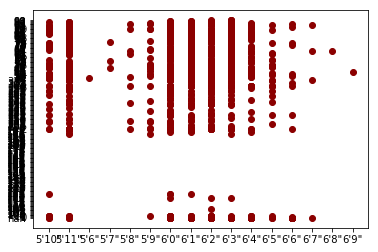

In [43]:
#Plot the data to see if a linear trend exists

plt.scatter(X,y, c = 'darkred')



In [31]:
#Use sklearn's `train_test_split` to splot the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=32)

In [35]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)

#Fit the model to the data
kmeans.fit(X_train)

# Use the data to predict the clusters
# save the predictions as `predicted_clusters`
predicted_clusters = kmeans.predict(X_train)

ValueError: c of shape (738,) not acceptable as a color sequence for x with size 738, y with size 738

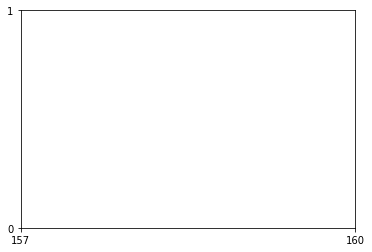

In [37]:
plt.scatter(X_train, y_train, c = predicted_clusters )

plt.show()